<a href="https://colab.research.google.com/github/sud0x00/SharadaProject-Annotated_Dataset/blob/main/NewVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Visualization



The following notebook contains updated code related to the creation of the dataset.


Code for visualizing the data after extracting the images with labels from the annotations is also made available


In [1]:
!git clone https://github.com/sud0x00/SharadaProject-Annotated_Dataset.git

Cloning into 'SharadaProject-Annotated_Dataset'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 444 (delta 2), reused 0 (delta 0), pack-reused 438
Receiving objects: 100% (444/444), 371.46 MiB | 32.88 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Updating files: 100% (498/498), done.


In [2]:
%mkdir dataset

In [4]:
from PIL import Image, ImageDraw, ImageOps
import json
import random
import string
import os
import numpy as np
import shutil


### The following code allows for the extraction images with labels from the annotations.

There are multiple conditions and exceptions which are added in the code due to the mislabelling present in the data


In [6]:
# Folder path containing the images and annotation files
src_folder = '/content/SharadaProject-Annotated_Dataset/Annotated Dataset/large-dataset'
dest_folder = '/content/dataset'

# Iterate over the files in the folder
for file_name in os.listdir(src_folder):
    # Check if the file is an image
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        # Construct the full file paths for the image and annotation files
        image_file = os.path.join(src_folder, file_name)
        annotation_file = os.path.join(src_folder, f"{os.path.splitext(file_name)[0]}.json")
        # Load the annotation file
        with open(annotation_file, 'r', encoding='utf-8') as f:
            annotation = json.load(f)

        # Get the image dimensions
        image_height = annotation['imageHeight']
        image_width = annotation['imageWidth']

        # Open the original image
        image = Image.open(image_file)

        # Loop through each shape in the annotation
        for shape in annotation['shapes']:
            shape_type = shape['shape_type']
            group_id = shape['group_id']
            label = shape['label']
            coordinates = shape['points']


            # Check if label is equal to "||" and change it to ".."
            if label == '||':
                label = 'fs2'

            if label == '|':
                label = 'fs1'

            if label == '|| || ||':
                label = 'fs3'

            if label == '?':
                label = 'unk'

            if label == '.':
                label = 'period'

            if label == '^':
                label = 'oth1'

            if label == "-":
                label == 'oth3'

            # Generate a random string of length 15
            random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=15))


            # Create a new image with a transparent background
            cropped_image = Image.new('RGBA', (image_width, image_height), (0, 0, 0, 0))

            # Create a draw object to draw the polygon on the new image
            draw = ImageDraw.Draw(cropped_image)

            # Convert the coordinates to integer tuples
            int_coordinates = [(int(point[0]), int(point[1])) for point in coordinates]

            # Draw the polygon on the new image
            draw.polygon(int_coordinates, fill=(255, 255, 255, 255))


            if shape_type == 'polygon':
                # Create a mask from the drawn polygon
                mask = ImageOps.invert(cropped_image.convert('L'))

                # Apply the mask to the original image
                masked_image = Image.new("RGBA", image.size)
                masked_image.paste(image, (0, 0), mask=cropped_image)

                # Find the bounding box of the polygon
                bbox = masked_image.getbbox()

                # Crop the masked image using the bounding box
                if bbox:
                    cropped_image = masked_image.crop(bbox)

                    # Create a new rectangular image with the determined background color
                    rectangular_image = Image.new("RGB", (cropped_image.width, cropped_image.height), (255, 255, 255))
                    rectangular_image.paste(cropped_image, (0, 0), cropped_image)

                    # Create the new filename with group ID, label, and random string
                    new_filename = os.path.join(dest_folder, f"{label}_{random_string}.jpg")

                    # Save the rectangular image as JPEG
                    rectangular_image.save(new_filename, format='JPEG', quality=100)

            if shape_type == 'rectangle':
                # Find the minimum and maximum x, y coordinates
                x_coordinates = [point[0] for point in int_coordinates]
                y_coordinates = [point[1] for point in int_coordinates]

                left = min(x_coordinates)
                top = min(y_coordinates)
                right = max(x_coordinates)
                bottom = max(y_coordinates)

                # Crop the original image using the bounding box
                cropped_image = image.crop((left, top, right, bottom))

                # Create the new filename with group ID, label, and random string
                new_filename = os.path.join(dest_folder, f"{label}_{random_string}.jpg")

                # Save the cropped image
                cropped_image.save(new_filename, format='JPEG', quality=100)

### Moves all the devanagari character to their respective folders according to the mapping.

In [5]:
all_chars = {'अ': '1', 'क': '2', 'ख': '3', 'ग': '4', 'घ': '5', 'ङ': '6', 'च': '7', 'छ': '8', 'ज': '9', 'झ': '10', 'ञ': '11', 'ट': '12', 'ठ': '13', 'ड': '14', 'ढ': '15', 'ण': '16', 'त': '17', 'थ': '18', 'द': '19', 'ध': '20', 'न': '21', 'प': '22', 'फ': '23', 'ब': '24', 'भ': '25', 'म': '26', 'य': '27', 'र': '28', 'ल': '29', 'ळ': '30', 'व': '31', 'श': '32', 'ष': '33', 'स': '34', 'ह': '35', 'क्ष': '36', 'त्र': '37', 'ज्ञ': '38'}
all_variants = {'अ': '1.1', 'आ': '1.2', 'इ': '1.3', 'ई': '1.4', 'उ': '1.5', 'ऊ': '1.6', 'ए': '1.7', 'ऐ': '1.8', 'ओ': '1.9', 'औ': '1.10', 'अं': '1.11', 'अ:': '1.12', 'ऋ': '1.13', 'ॠ': '1.14', 'ऌ': '1.15', 'ॡ': '1.16', 'क': '2.1', 'का': '2.2', 'कि': '2.3', 'की': '2.4', 'कु': '2.5', 'कू': '2.6', 'के': '2.7', 'कै': '2.8', 'को': '2.9', 'कौ': '2.10', 'कं': '2.11', 'कः': '2.12', 'कृ': '2.13', 'कॄ': '2.14', 'कॢ': '2.15', 'कॣ': '2.16', 'ख': '3.1', 'खा': '3.2', 'खि': '3.3', 'खी': '3.4', 'खु': '3.5', 'खू': '3.6', 'खे': '3.7', 'खै': '3.8', 'खो': '3.9', 'खौ': '3.10', 'खं': '3.11', 'खः': '3.12', 'खृ': '3.13', 'खॄ': '3.14', 'खॢ': '3.15', 'खॣ': '3.16', 'ग': '4.1', 'गा': '4.2', 'गि': '4.3', 'गी': '4.4', 'गु': '4.5', 'गू': '4.6', 'गे': '4.7', 'गै': '4.8', 'गो': '4.9', 'गौ': '4.10', 'गं': '4.11', 'गः': '4.12', 'गृ': '4.13', 'गॄ': '4.14', 'गॢ': '4.15', 'गॣ': '4.16', 'घ': '5.1', 'घा': '5.2', 'घि': '5.3', 'घी': '5.4', 'घु': '5.5', 'घू': '5.6', 'घे': '5.7', 'घै': '5.8', 'घो': '5.9', 'घौ': '5.10', 'घं': '5.11', 'घः': '5.12', 'घृ': '5.13', 'घॄ': '5.14', 'घॢ': '5.15', 'घॣ': '5.16', 'ङ': '6.1', 'ङा': '6.2', 'ङि': '6.3', 'ङी': '6.4', 'ङु': '6.5', 'ङू': '6.6', 'ङे': '6.7', 'ङै': '6.8', 'ङो': '6.9', 'ङौ': '6.10', 'ङं': '6.11', 'ङः': '6.12', 'ङृ': '6.13', 'ङॄ': '6.14', 'ङॢ': '6.15', 'ङॣ': '6.16', 'च': '7.1', 'चा': '7.2', 'चि': '7.3', 'ची': '7.4', 'चु': '7.5', 'चू': '7.6', 'चे': '7.7', 'चै': '7.8', 'चो': '7.9', 'चौ': '7.10', 'चं': '7.11', 'चः': '7.12', 'चृ': '7.13', 'चॄ': '7.14', 'चॢ': '7.15', 'चॣ': '7.16', 'छ': '8.1', 'छा': '8.2', 'छि': '8.3', 'छी': '8.4', 'छु': '8.5', 'छू': '8.6', 'छे': '8.7', 'छै': '8.8', 'छो': '8.9', 'छौ': '8.10', 'छं': '8.11', 'छः': '8.12', 'छृ': '8.13', 'छॄ': '8.14', 'छॢ': '8.15', 'छॣ': '8.16', 'ज': '9.1', 'जा': '9.2', 'जि': '9.3', 'जी': '9.4', 'जु': '9.5', 'जू': '9.6', 'जे': '9.7', 'जै': '9.8', 'जो': '9.9', 'जौ': '9.10', 'जं': '9.11', 'जः': '9.12', 'जृ': '9.13', 'जॄ': '9.14', 'जॢ': '9.15', 'जॣ': '9.16', 'झ': '10.1', 'झा': '10.2', 'झि': '10.3', 'झी': '10.4', 'झु': '10.5', 'झू': '10.6', 'झे': '10.7', 'झै': '10.8', 'झो': '10.9', 'झौ': '10.10', 'झं': '10.11', 'झः': '10.12', 'झृ': '10.13', 'झॄ': '10.14', 'झॢ': '10.15', 'झॣ': '10.16', 'ञ': '11.1', 'ञा': '11.2', 'ञि': '11.3', 'ञी': '11.4', 'ञु': '11.5', 'ञू': '11.6', 'ञे': '11.7', 'ञै': '11.8', 'ञो': '11.9', 'ञौ': '11.10', 'ञं': '11.11', 'ञः': '11.12', 'ञृ': '11.13', 'ञॄ': '11.14', 'ञॢ': '11.15', 'ञॣ': '11.16', 'ट': '12.1', 'टा': '12.2', 'टि': '12.3', 'टी': '12.4', 'टु': '12.5', 'टू': '12.6', 'टे': '12.7', 'टै': '12.8', 'टो': '12.9', 'टौ': '12.10', 'टं': '12.11', 'टः': '12.12', 'टृ': '12.13', 'टॄ': '12.14', 'टॢ': '12.15', 'टॣ': '12.16', 'ठ': '13.1', 'ठा': '13.2', 'ठि': '13.3', 'ठी': '13.4', 'ठु': '13.5', 'ठू': '13.6', 'ठे': '13.7', 'ठै': '13.8', 'ठो': '13.9', 'ठौ': '13.10', 'ठं': '13.11', 'ठः': '13.12', 'ठृ': '13.13', 'ठॄ': '13.14', 'ठॢ': '13.15', 'ठॣ': '13.16', 'ड': '14.1', 'डा': '14.2', 'डि': '14.3', 'डी': '14.4', 'डु': '14.5', 'डू': '14.6', 'डे': '14.7', 'डै': '14.8', 'डो': '14.9', 'डौ': '14.10', 'डं': '14.11', 'डः': '14.12', 'डृ': '14.13', 'डॄ': '14.14', 'डॢ': '14.15', 'डॣ': '14.16', 'ढ': '15.1', 'ढा': '15.2', 'ढि': '15.3', 'ढी': '15.4', 'ढु': '15.5', 'ढू': '15.6', 'ढे': '15.7', 'ढै': '15.8', 'ढो': '15.9', 'ढौ': '15.10', 'ढं': '15.11', 'ढः': '15.12', 'ढृ': '15.13', 'ढॄ': '15.14', 'ढॢ': '15.15', 'ढॣ': '15.16', 'ण': '16.1', 'णा': '16.2', 'णि': '16.3', 'णी': '16.4', 'णु': '16.5', 'णू': '16.6', 'णे': '16.7', 'णै': '16.8', 'णो': '16.9', 'णौ': '16.10', 'णं': '16.11', 'णः': '16.12', 'णृ': '16.13', 'णॄ': '16.14', 'णॢ': '16.15', 'णॣ': '16.16', 'त': '17.1', 'ता': '17.2', 'ति': '17.3', 'ती': '17.4', 'तु': '17.5', 'तू': '17.6', 'ते': '17.7', 'तै': '17.8', 'तो': '17.9', 'तौ': '17.10', 'तं': '17.11', 'तः': '17.12', 'तृ': '17.13', 'तॄ': '17.14', 'तॢ': '17.15', 'तॣ': '17.16', 'थ': '18.1', 'था': '18.2', 'थि': '18.3', 'थी': '18.4', 'थु': '18.5', 'थू': '18.6', 'थे': '18.7', 'थै': '18.8', 'थो': '18.9', 'थौ': '18.10', 'थं': '18.11', 'थः': '18.12', 'थृ': '18.13', 'थॄ': '18.14', 'थॢ': '18.15', 'थॣ': '18.16', 'द': '19.1', 'दा': '19.2', 'दि': '19.3', 'दी': '19.4', 'दु': '19.5', 'दू': '19.6', 'दे': '19.7', 'दै': '19.8', 'दो': '19.9', 'दौ': '19.10', 'दं': '19.11', 'दः': '19.12', 'दृ': '19.13', 'दॄ': '19.14', 'दॢ': '19.15', 'दॣ': '19.16', 'ध': '20.1', 'धा': '20.2', 'धि': '20.3', 'धी': '20.4', 'धु': '20.5', 'धू': '20.6', 'धे': '20.7', 'धै': '20.8', 'धो': '20.9', 'धौ': '20.10', 'धं': '20.11', 'धः': '20.12', 'धृ': '20.13', 'धॄ': '20.14', 'धॢ': '20.15', 'धॣ': '20.16', 'न': '21.1', 'ना': '21.2', 'नि': '21.3', 'नी': '21.4', 'नु': '21.5', 'नू': '21.6', 'ने': '21.7', 'नै': '21.8', 'नो': '21.9', 'नौ': '21.10', 'नं': '21.11', 'नः': '21.12', 'नृ': '21.13', 'नॄ': '21.14', 'नॢ': '21.15', 'नॣ': '21.16', 'प': '22.1', 'पा': '22.2', 'पि': '22.3', 'पी': '22.4', 'पु': '22.5', 'पू': '22.6', 'पे': '22.7', 'पै': '22.8', 'पो': '22.9', 'पौ': '22.10', 'पं': '22.11', 'पः': '22.12', 'पृ': '22.13', 'पॄ': '22.14', 'पॢ': '22.15', 'पॣ': '22.16', 'फ': '23.1', 'फा': '23.2', 'फि': '23.3', 'फी': '23.4', 'फु': '23.5', 'फू': '23.6', 'फे': '23.7', 'फै': '23.8', 'फो': '23.9', 'फौ': '23.10', 'फं': '23.11', 'फः': '23.12', 'फृ': '23.13', 'फॄ': '23.14', 'फॢ': '23.15', 'फॣ': '23.16', 'ब': '24.1', 'बा': '24.2', 'बि': '24.3', 'बी': '24.4', 'बु': '24.5', 'बू': '24.6', 'बे': '24.7', 'बै': '24.8', 'बो': '24.9', 'बौ': '24.10', 'बं': '24.11', 'बः': '24.12', 'बृ': '24.13', 'बॄ': '24.14', 'बॢ': '24.15', 'बॣ': '24.16', 'भ': '25.1', 'भा': '25.2', 'भि': '25.3', 'भी': '25.4', 'भु': '25.5', 'भू': '25.6', 'भे': '25.7', 'भै': '25.8', 'भो': '25.9', 'भौ': '25.10', 'भं': '25.11', 'भः': '25.12', 'भृ': '25.13', 'भॄ': '25.14', 'भॢ': '25.15', 'भॣ': '25.16', 'म': '26.1', 'मा': '26.2', 'मि': '26.3', 'मी': '26.4', 'मु': '26.5', 'मू': '26.6', 'मे': '26.7', 'मै': '26.8', 'मो': '26.9', 'मौ': '26.10', 'मं': '26.11', 'मः': '26.12', 'मृ': '26.13', 'मॄ': '26.14', 'मॢ': '26.15', 'मॣ': '26.16', 'य': '27.1', 'या': '27.2', 'यि': '27.3', 'यी': '27.4', 'यु': '27.5', 'यू': '27.6', 'ये': '27.7', 'यै': '27.8', 'यो': '27.9', 'यौ': '27.10', 'यं': '27.11', 'यः': '27.12', 'यृ': '27.13', 'यॄ': '27.14', 'यॢ': '27.15', 'यॣ': '27.16', 'र': '28.1', 'रा': '28.2', 'रि': '28.3', 'री': '28.4', 'रु': '28.5', 'रू': '28.6', 'रे': '28.7', 'रै': '28.8', 'रो': '28.9', 'रौ': '28.10', 'रं': '28.11', 'रः': '28.12', 'रृ': '28.13', 'रॄ': '28.14', 'रॢ': '28.15', 'रॣ': '28.16', 'ल': '29.1', 'ला': '29.2', 'लि': '29.3', 'ली': '29.4', 'लु': '29.5', 'लू': '29.6', 'ले': '29.7', 'लै': '29.8', 'लो': '29.9', 'लौ': '29.10', 'लं': '29.11', 'लः': '29.12', 'लृ': '29.13', 'लॄ': '29.14', 'लॢ': '29.15', 'लॣ': '29.16', 'ळ': '30.1', 'ळा': '30.2', 'ळि': '30.3', 'ळी': '30.4', 'ळु': '30.5', 'ळू': '30.6', 'ळे': '30.7', 'ळै': '30.8', 'ळो': '30.9', 'ळौ': '30.10', 'ळं': '30.11', 'ळः': '30.12', 'ळृ': '30.13', 'ळॄ': '30.14', 'ळॢ': '30.15', 'ळॣ': '30.16', 'व': '31.1', 'वा': '31.2', 'वि': '31.3', 'वी': '31.4', 'वु': '31.5', 'वू': '31.6', 'वे': '31.7', 'वै': '31.8', 'वो': '31.9', 'वौ': '31.10', 'वं': '31.11', 'वः': '31.12', 'वृ': '31.13', 'वॄ': '31.14', 'वॢ': '31.15', 'वॣ': '31.16', 'श': '32.1', 'शा': '32.2', 'शि': '32.3', 'शी': '32.4', 'शु': '32.5', 'शू': '32.6', 'शे': '32.7', 'शै': '32.8', 'शो': '32.9', 'शौ': '32.10', 'शं': '32.11', 'शः': '32.12', 'शृ': '32.13', 'शॄ': '32.14', 'शॢ': '32.15', 'शॣ': '32.16', 'ष': '33.1', 'षा': '33.2', 'षि': '33.3', 'षी': '33.4', 'षु': '33.5', 'षू': '33.6', 'षे': '33.7', 'षै': '33.8', 'षो': '33.9', 'षौ': '33.10', 'षं': '33.11', 'षः': '33.12', 'षृ': '33.13', 'षॄ': '33.14', 'षॢ': '33.15', 'षॣ': '33.16', 'स': '34.1', 'सा': '34.2', 'सि': '34.3', 'सी': '34.4', 'सु': '34.5', 'सू': '34.6', 'से': '34.7', 'सै': '34.8', 'सो': '34.9', 'सौ': '34.10', 'सं': '34.11', 'सः': '34.12', 'सृ': '34.13', 'सॄ': '34.14', 'सॢ': '34.15', 'सॣ': '34.16', 'ह': '35.1', 'हा': '35.2', 'हि': '35.3', 'ही': '35.4', 'हु': '35.5', 'हू': '35.6', 'हे': '35.7', 'है': '35.8', 'हो': '35.9', 'हौ': '35.10', 'हं': '35.11', 'हः': '35.12', 'हृ': '35.13', 'हॄ': '35.14', 'हॢ': '35.15', 'हॣ': '35.16', 'क्ष': '36.1', 'क्षा': '36.2', 'क्षि': '36.3', 'क्षी': '36.4', 'क्षु': '36.5', 'क्षू': '36.6', 'क्षे': '36.7', 'क्षै': '36.8', 'क्षो': '36.9', 'क्षौ': '36.10', 'क्षं': '36.11', 'क्षः': '36.12', 'क्षृ': '36.13', 'क्षॄ': '36.14', 'क्षॢ': '36.15', 'क्षॣ': '36.16', 'त्र': '37.1', 'त्रा': '37.2', 'त्रि': '37.3', 'त्री': '37.4', 'त्रु': '37.5', 'त्रू': '37.6', 'त्रे': '37.7', 'त्रै': '37.8', 'त्रो': '37.9', 'त्रौ': '37.10', 'त्रं': '37.11', 'त्रः': '37.12', 'त्रृ': '37.13', 'त्रॄ': '37.14', 'त्रॢ': '37.15', 'त्रॣ': '37.16', 'ज्ञ': '38.1', 'ज्ञा': '38.2', 'ज्ञि': '38.3', 'ज्ञी': '38.4', 'ज्ञु': '38.5', 'ज्ञू': '38.6', 'ज्ञे': '38.7', 'ज्ञै': '38.8', 'ज्ञो': '38.9', 'ज्ञौ': '38.10', 'ज्ञं': '38.11', 'ज्ञः': '38.12', 'ज्ञृ': '38.13', 'ज्ञॄ': '38.14', 'ज्ञॢ': '38.15', 'ज्ञॣ': '38.16'}

In [9]:
# Create the main "dataset" folder
os.makedirs("dataset", exist_ok=True)

# Create 16 folders named from 1 to 38
for i in range(1, 39):
    folder_path = os.path.join("dataset", str(i))
    os.makedirs(folder_path, exist_ok=True)

# Create 38 subfolders in each folder (except the "extra" folder)
for folder_num in range(1, 39):
    for subfolder_num in range(1, 17):
        folder_name = f"{folder_num}.{subfolder_num}"
        folder_path = os.path.join("dataset", str(folder_num), folder_name)
        os.makedirs(folder_path, exist_ok=True)

# Create the "extra" folder
os.makedirs("dataset/extra", exist_ok=True)

# Define the source folder containing the images
source_folder = "dataset"

# Iterate through the image files and move them to their respective subfolders
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg"):
        label = filename.split("_")[0]
        if label in all_variants:
            subfolder_name = all_variants[label]
            main_folder, subfolder_num = subfolder_name.split('.')
            folder_path = os.path.join("dataset", main_folder, subfolder_name)
        else:
            folder_path = "dataset/extra"
        source_file_path = os.path.join(source_folder, filename)
        destination_file_path = os.path.join(folder_path, filename)
        shutil.move(source_file_path, destination_file_path)

print("Files moved successfully!")

In [16]:
# Step 1: Loop through the main folders (1 to 38)
for main_folder_num in range(1, 39):
    main_folder_path = os.path.join("/content/dataset", str(main_folder_num))

    # Step 2: Loop through the subfolders (1 to 16) inside each main folder
    for sub_folder_num in range(1, 17):
        sub_folder_name = f"{main_folder_num}.{sub_folder_num}"
        sub_folder_path = os.path.join(main_folder_path, sub_folder_name)
        files = os.listdir(sub_folder_path)

        # Step 3: Rename files inside each subfolder
        for file_name in files:
            if "_" in file_name:  # To ensure there's an underscore in the file name
                new_file_name = f'{sub_folder_name}_{file_name.split("_", 1)[1]}'
                old_file_path = os.path.join(sub_folder_path, file_name)
                new_file_path = os.path.join(sub_folder_path, new_file_name)
                os.rename(old_file_path, new_file_path)

## Data Visualization code


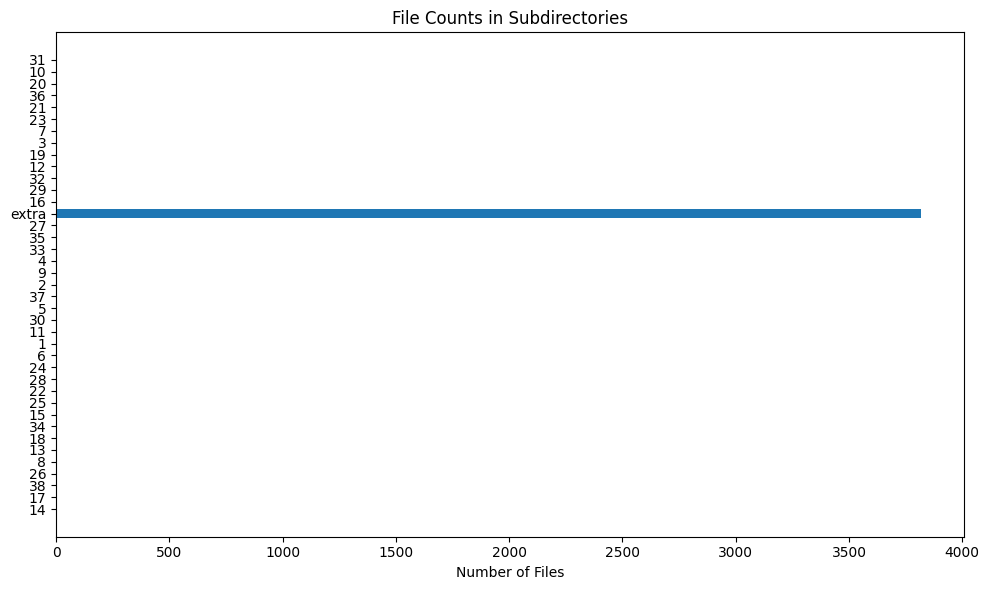

In [29]:
import os
import matplotlib.pyplot as plt

def count_files_in_subdirectories(folder_path):
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    file_counts = []

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(folder_path, subdirectory)
        files_in_subdirectory = [f for f in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, f))]
        file_counts.append(len(files_in_subdirectory))

    return subdirectories, file_counts

def visualize_file_counts(folder_path, title='File Counts in Subdirectories'):
    subdirectories, file_counts = count_files_in_subdirectories(folder_path)
    num_subdirectories = len(subdirectories)

    plt.figure(figsize=(10, 6))
    plt.barh(range(num_subdirectories), file_counts, align='center')
    plt.yticks(range(num_subdirectories), subdirectories)
    plt.xlabel('Number of Files')
    plt.title(title)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    folder_path = '/content/dataset'
    visualize_file_counts(folder_path)
